In [160]:
import time
import datetime
import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from tqdm import tqdm
from mtranslate import translate


In [96]:
#### Importing the file ####
Path="src/"
Filename='projects.csv'
Cat_File="category_hier.csv"
Data=pd.read_csv(Path+Filename)
Cat_data=pd.read_csv(Path+Cat_File)

In [66]:
# Reducing the level of data to level 2
#Cat_data=Cat_data.drop(columns=Cat_data.columns[-3:]).drop_duplicates()
#Cat_data.index=Cat_data["Level 2 code"]
#Cat_data["Level 3 description"]=Cat_data["Level 3 description"].apply(lambda x:x.lower().replace("-","").replace(",","").strip())
#Cat_data["Level 2 description"]=Cat_data["Level 2 description"].apply(lambda x:x.lower().replace("-","").replace(",","").strip())
#Data["SubjectArea"]=Data["SubjectArea"].apply(lambda x:str(x).lower().replace("-","").replace(",","").strip())

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60825 entries, 0 to 60824
Data columns (total 7 columns):
Name           60825 non-null object
SubUrl         60825 non-null object
FundingFrom    60825 non-null int64
FundingEnd     60825 non-null int64
SubjectArea    60464 non-null object
Institution    57132 non-null object
Description    60825 non-null object
dtypes: int64(2), object(5)
memory usage: 3.2+ MB


In [6]:
Data.head()

,Name,SubUrl,FundingFrom,FundingEnd,SubjectArea,Institution,Description
0,GRK 6:&nbsp; Spatial Statistics,/gepris/projekt/268853,1997,2003,Mathematics,Technische Universität Bergakademie Freiberg,The work of the research training group is dir...
1,GRK 12:&nbsp; Migration in Modern Europe,/gepris/projekt/268931,1995,2004,Social Sciences,Universität Osnabrück,The subject of the research training group 'Mi...
2,GRK 30:&nbsp; Legal History of the European Cl...,/gepris/projekt/269105,1996,2002,Jurisprudence,Goethe-Universität Frankfurt am Main,No abstract available
3,GRK 45:&nbsp; Integrated Fluidical Sensor-Actu...,/gepris/projekt/269237,1995,2004,Production Technology,Universität Rostock,The goal of this program consists in the mathe...
4,GRK 52:&nbsp; Quantum Field Theory: Mathematic...,/gepris/projekt/269303,1995,2004,Condensed Matter Physics,Universität Leipzig,The aim of the research training group is to p...


In [10]:
len(Data[Data["Description"].str.strip()=="No abstract available"])
## 8585 project descrition is not available

8585

In [216]:
Data["Name"][Data["Description"].str.strip()=="No abstract available"].tail(10).tolist()

['Discourses of united theology ',
 'A walk through the park: Understanding emotional mimicry in an ecological context ',
 'Cobordism categories and geometric topology (E01 (Frenck)) ',
 'Patterning of the epithelial planar polarized microtubule cytoskeleton ',
 'The role of Collagen XVII and the hemidesmosome in stroma-driven progression and invasiveness of pancreatic cancer ',
 'Qatna Studien 10: Gold of kings and gods. On the importance of gold objects for the Syrian/ Northern Levantine kingdoms of the Middle and Late Bronze Ages based on the finds from the tombs of Qatna ',
 "A 'genealogy of hybridity'. the Treatened Orders of the multicultural Istrian peninsula (1970 - 2013) (EZ1 (G03) Simon) ",
 'Fresnel wavelets for coherent diffractive imaging (E01_Geppert) ',
 'Riots in mining regions. Germany and the United Kingdom during the 20th century (EZ6 (A03) Stern) ',
 'Direct oxidative coupling for sustainable chemistry ']

In [217]:
## Need to cleanse the title - only probablitic in first 210 records

Data.Name.head(10).tolist()

['GRK 6:&nbsp; Spatial Statistics ',
 'GRK 12:&nbsp; Migration in Modern Europe ',
 'GRK 30:&nbsp; Legal History of the European Classical Antiquity, the Middle Ages, Legal History of Modern Times and Contemporary Legal History ',
 'GRK 45:&nbsp; Integrated Fluidical Sensor-Actuator Systems ',
 'GRK 52:&nbsp; Quantum Field Theory: Mathematical Structure and Applications to Elementary Particle and Solid State Physics ',
 'GRK 60:&nbsp; Molecular Biological Analysis of Pathophysiological Processes ',
 'GRK 80:&nbsp; Model Studies of Structures, Properties and Recognition of Biologically Relevant Molecules at Atomic Level ',
 'GRK 115:&nbsp; Ocean Engineering Structures ',
 'GRK 120:&nbsp; Signalling Cascades in Living Systems ',
 'GRK 136:&nbsp; System Efficiency and System Dynamics in Developing Countries ? The Micro-Foundation of Macro-Processes of Economic, Political and Social Transformation ']

In [98]:
merged_data=Data.merge(Cat_data[["File_Categories","Category"]], how="left", left_on="SubjectArea", right_on="File_Categories")

In [102]:
pd.Series(merged_data["SubjectArea"][pd.isnull(merged_data["File_Categories"])].unique())

0    NaN
dtype: object

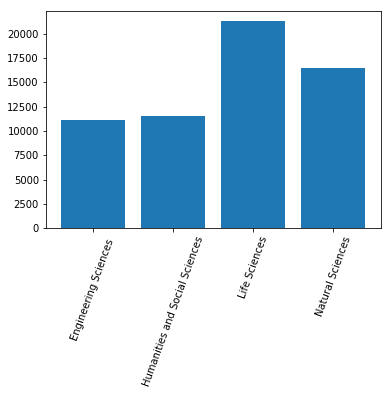

In [124]:
y=merged_data.groupby("Category").count()["Description"].index
x=merged_data.groupby("Category").count()["Description"].values

plt.bar(y,x);
plt.xticks(rotation=70);

<Figure size 720x360 with 0 Axes>

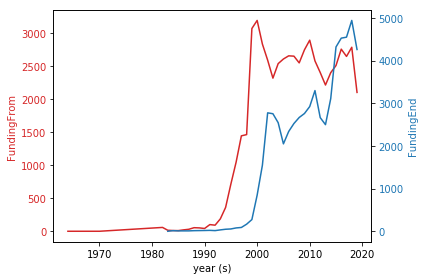

In [206]:

figure(num=None, figsize=(10,5))

y=merged_data[merged_data.FundingFrom!=0].groupby("FundingFrom").count()["Description"].index
x=merged_data[merged_data.FundingFrom!=0].groupby("FundingFrom").count()["Description"].values

y2=merged_data[merged_data.FundingEnd!=0].groupby("FundingEnd").count()["Description"].index
x2=merged_data[merged_data.FundingEnd!=0].groupby("FundingEnd").count()["Description"].values

fig, ax1 = plt.subplots();

color = 'tab:red';
ax1.set_xlabel('year (s)');
ax1.set_ylabel('FundingFrom', color=color);
ax1.plot(y,x, color=color);
ax1.tick_params(axis='y', labelcolor=color);

ax2 = ax1.twinx();

color = 'tab:blue'

ax2.set_ylabel('FundingEnd', color=color);
ax2.plot(y2,x2, color=color);
ax2.tick_params(axis='y', labelcolor=color);
fig.tight_layout();  # otherwise the right y-label is slightly clipped
plt.show();

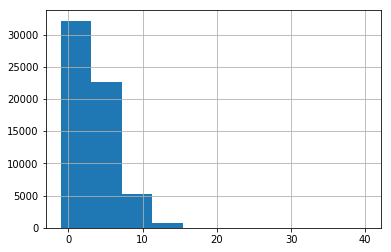

In [207]:
merged_data["Fundingperiod"]=merged_data["FundingEnd"]-merged_data["FundingFrom"]

merged_data.Fundingperiod.hist();


In [213]:
# Total institutes - Length: 2567

merged_data[merged_data.Institution.str.strip()!=""].groupby("Institution").count()["Description"].sort_values(ascending=False).head(10)

Institution
 Rheinische Friedrich-Wilhelms-Universität Bonn         855
 Rheinisch-Westfälische Technische Hochschule Aachen    847
 Georg-August-Universität Göttingen                     816
 Ludwig-Maximilians-Universität München                 809
 Goethe-Universität Frankfurt am Main                   797
 Technische Universität München                         776
 Ruhr-Universität Bochum                                635
 Universität Stuttgart                                  594
 Johannes Gutenberg-Universität Mainz                   579
 Technische Universität Berlin                          548
Name: Description, dtype: int64